In [1]:
import tensorflow as tf
from source import model as yl
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, CSVLogger
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
model = yl.build_model(128, 128, 1, 1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.5,
                                         patience=1,
                                         verbose=1,)
callbacks = [reduce_learning_rate,]
loss = yl.Yolo(1, 1)
model.compile(loss=loss, optimizer=optimizer)

In [3]:
x = np.load('data/X.npy')
y = np.load('data/Y.npy')

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

In [4]:
model.fit(x = X_train,
          y = y_train,
          epochs = 100,
          callbacks=callbacks,
          verbose=1,
          validation_split=0.05)

Epoch 1/100
119/119 [==============================] - 43s 301ms/step - loss: 6859.1021 - val_loss: 10065.9502 - lr: 0.5000
Epoch 2/100
119/119 [==============================] - 33s 275ms/step - loss: 6486.6123 - val_loss: 6961.4692 - lr: 0.5000
Epoch 3/100
119/119 [==============================] - ETA: 0s - loss: 6495.3706
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.25.
119/119 [==============================] - 33s 276ms/step - loss: 6495.3706 - val_loss: 6820.5161 - lr: 0.5000
Epoch 4/100
119/119 [==============================] - 33s 278ms/step - loss: 6454.7505 - val_loss: 7176.9395 - lr: 0.2500
Epoch 5/100
119/119 [==============================] - 33s 278ms/step - loss: 6413.0747 - val_loss: 7651.5586 - lr: 0.2500
Epoch 6/100
119/119 [==============================] - ETA: 0s - loss: 6508.2646
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.125.
119/119 [==============================] - 33s 278ms/step - loss: 6508.2646 - val_loss: 6764.6118 - lr: 0.2500
Epoc

1/1 [==============================] - 0s 23ms/step


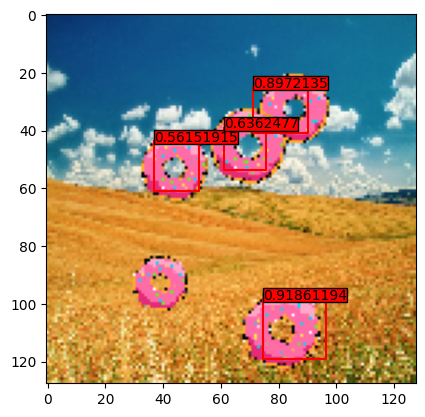

In [20]:
import numpy as np
import matplotlib.pyplot as plt
ind = int(np.random.randint(1,1000,1)[0])
x_t = X_test[ind:ind+1]
y_predict = model.predict(x_t)
# y_predict = y_test[ind:ind+1]
sigm = lambda x: 1/(1+np.e**(-x))
s = []
for x in range(16):
    for y in range(16):
        pred = y_predict[0][y,x]
        if pred[4] > 0.5 :
            X = sigm(pred[0])*(128/16) + (x)*(128/16)
            Y = sigm(pred[1])*(128/16) + (y)*(128/16)
            W = 10*np.e**pred[2]
            H = 10*np.e**pred[3]
            s.append([[X-W/2,X+W/2,X+W/2,X-W/2,X-W/2],[Y-H/2,Y-H/2,Y+H/2,Y+H/2,Y-H/2],pred[4]])

plt.imshow(x_t[0][:,:,::-1])
for i in range(len(s)):
    plt.plot(s[i][0],s[i][1], color = 'red')
    plt.text(s[i][0][0],s[i][1][0],str(s[i][2]),bbox={'facecolor': 'red', 'alpha': 1, 'pad': 0.1})

In [74]:
ind

834